# No Sampling

#### importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC 
%matplotlib inline


In [2]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [3]:
def report(yt, y_pred):
    d = {"Accuracy": accuracy_score(yt, y_pred),
         "Precision": precision_score(yt, y_pred),
         "Recall": recall_score(yt, y_pred),
         "F1 score": f1_score(yt, y_pred)}
    rep = pd.DataFrame(d, index=[0])
    #print(rep)
    return rep


In [4]:
def plot_confusion_matrix(y, y_predict, t='Confusion Matrix'):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.heatmap(cm, annot=True, ax=ax, cmap='mako', fmt=',d').set_title(
        t, fontsize=12)
    # sns.color_palette("mako", as_cmap=True)
    ax.set_xlabel('Predicted labels', fontsize=10)
    ax.set_ylabel('True labels', fontsize=10)
    # ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    ax.yaxis.set_ticklabels(['BENIGN', 'MALIGNANT'], fontsize=8)
    plt.show()


Importing data


In [5]:
df = pd.read_csv('train40Features.csv')
target = pd.read_csv('train.csv')

In [6]:
df.head()

,sex,age_approx,anatom_site_general_challenge,V1,V2,V3,V4,V5,V6,V7,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,3,45.0,2,0.1024,9,8789.0625,84.667969,147,1435.546875,2.148438,...,1.835102,1.428571,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426
1,2,45.0,7,0.1024,5,4882.8125,84.570312,88,859.375000,1.687500,...,1.301577,1.666667,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091
2,2,50.0,3,0.1024,6,5859.3750,84.960938,100,976.562500,1.781250,...,1.475337,1.531477,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386
3,2,45.0,2,0.1024,15,14648.4375,84.765625,210,2050.781250,2.640625,...,2.772424,1.000000,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073
4,2,55.0,7,0.1024,6,5859.3750,84.667969,98,957.031250,1.765625,...,1.358362,1.479167,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426


In [7]:
target.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [8]:
df.isnull().sum()

sex                              0
age_approx                       0
anatom_site_general_challenge    0
V1                               0
V2                               0
V3                               0
V4                               0
V5                               0
V6                               0
V7                               0
V8                               0
V9                               0
V10                              0
V11                              0
V12                              0
V13                              0
V14                              0
V15                              0
V16                              0
V17                              0
V18                              0
V19                              0
V20                              0
V21                              0
V22                              0
V23                              0
V24                              0
V25                              0
V26                 

In [10]:
for i in range(len(target.columns)):
    if target.iloc[:, i].isnull().sum():
        print(target.columns[i], target.iloc[:, i].isnull().sum())


sex 65
age_approx 68
anatom_site_general_challenge 527


In [13]:
#adding target column to our train dataset
df['target'] = target['target']

In [14]:
df.drop('V1',axis = 1, inplace = True) 

In [15]:
columns = ['sex','age','anatomy','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8','V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34','V35','V36','target']
df.columns = columns
df.head()

,sex,age,anatomy,V1,V2,V3,V4,V5,V6,V7,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,target
0,3,45.0,2,9,8789.0625,84.667969,147,1435.546875,2.148438,0.074062,...,1.428571,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426,0
1,2,45.0,7,5,4882.8125,84.570312,88,859.375000,1.687500,0.074457,...,1.666667,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091,0
2,2,50.0,3,6,5859.3750,84.960938,100,976.562500,1.781250,0.074682,...,1.531477,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386,0
3,2,45.0,2,15,14648.4375,84.765625,210,2050.781250,2.640625,0.075285,...,1.000000,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073,0
4,2,55.0,7,6,5859.3750,84.667969,98,957.031250,1.765625,0.074475,...,1.479167,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426,0


In [16]:
# df.drop(['anatomy','sex', 'age'],axis = 1, inplace = True)

In [18]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,target
0,9,8789.0625,84.667969,147,1435.546875,2.148438,0.074062,0.011378,0.074062,0.00120,...,1.428571,1.176471,0.368451,24.984602,1.309416,0.272855,0.098885,52.594848,0.428426,0
1,5,4882.8125,84.570312,88,859.375000,1.687500,0.074457,0.020480,0.074457,0.00250,...,1.666667,1.095238,0.391409,25.587810,1.240345,0.317342,0.125999,57.991760,0.430091,0
2,6,5859.3750,84.960938,100,976.562500,1.781250,0.074682,0.017067,0.074682,0.00330,...,1.531477,0.581197,0.209879,14.387222,1.272196,0.410767,0.138850,56.623874,0.423386,0
3,15,14648.4375,84.765625,210,2050.781250,2.640625,0.075285,0.006827,0.075285,0.00010,...,1.000000,2.000000,0.643102,47.842749,1.504529,0.830075,0.271822,46.900691,0.425073,0
4,6,5859.3750,84.667969,98,957.031250,1.765625,0.074475,0.017067,0.074475,0.00265,...,1.479167,1.100000,0.361749,23.899347,1.310327,0.357306,0.125601,57.289260,0.428426,0


In [19]:
# x= df[df['target'] == 1]

In [20]:
df['target'].value_counts()

target
0    32542
1      584
Name: count, dtype: int64

In [21]:
# yres=pd.DataFrame(df['target'])
# yres['target'].value_counts()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1), df['target'], test_size=0.25, random_state=4)


In [23]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(24844, 36) (8282, 36) (24844,) (8282,)


In [24]:
y_test.value_counts()


target
0    8123
1     159
Name: count, dtype: int64

In [25]:
y_train.value_counts()

target
0    24419
1      425
Name: count, dtype: int64

# Decision Tree Classifier

In [27]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
rep= report(y_test, y_pred)
rep

,Accuracy,Precision,Recall,F1 score
0,0.964381,0.085366,0.08805,0.086687


In [29]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [31]:
clf = DecisionTreeClassifier(splitter='best')
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
rep= report(y_test, y_pred)
rep

,Accuracy,Precision,Recall,F1 score
0,0.963173,0.070588,0.075472,0.072948


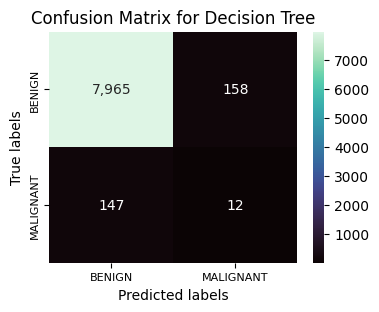

In [34]:
plot_confusion_matrix(y_test,y_pred, 'Confusion Matrix for Decision Tree')

# K Nearest Neighbors Classifier

In [36]:
#KNN MODEL
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=4)  # metric='minkowski', p=2
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)  


In [37]:
rep = report(y_test, y_pred)
rep

,Accuracy,Precision,Recall,F1 score
0,0.980681,0.0,0.0,0.0


# Support Vector Classifier

In [40]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train) 
y_pred= classifier.predict(x_test)

Accuracy: 0.9808017387104564


In [42]:
rep = report(y_test, y_pred)
rep

c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Precision,Recall,F1 score
0,0.980802,0.0,0.0,0.0


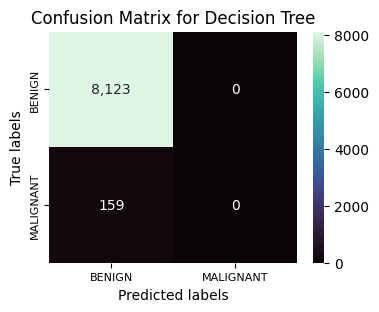

In [41]:
plot_confusion_matrix(y_test,y_pred, 'Confusion Matrix for Decision Tree')

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
ypred = rfc.predict(x_test)

In [51]:
rep = report(y_test, ypred)
rep

,Accuracy,Precision,Recall,F1 score
0,0.980681,0.454545,0.031447,0.058824


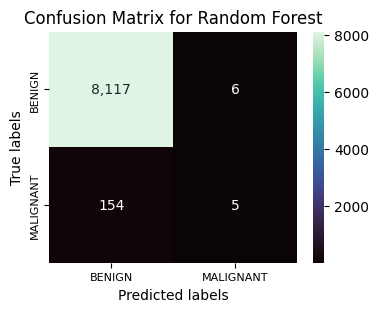

In [53]:
plot_confusion_matrix(y_test,ypred, "Confusion Matrix for Random Forest")

# XGBoost Classifier

In [66]:
from xgboost import XGBClassifier

In [67]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
yhat= xgb.predict(x_test)

In [69]:
rep= report(y_test, yhat)
rep

,Accuracy,Precision,Recall,F1 score
0,0.980922,0.555556,0.031447,0.059524


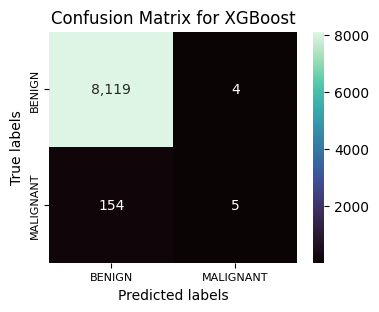

In [70]:
plot_confusion_matrix(y_test,yhat, 'Confusion Matrix for XGBoost')

# LightGBM Classifier

In [72]:
from lightgbm import LGBMClassifier

In [73]:
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, class_weight='balanced')
model.fit(x_train, y_train)
# Predicting the Target variable
pred = model.predict(x_test)
# print(pred)
rep= report(y_test, pred)
rep


,Accuracy,Precision,Recall,F1 score
0,0.938541,0.079327,0.207547,0.114783


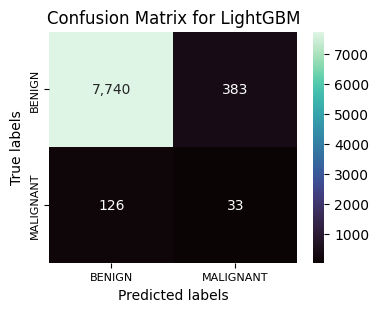

In [75]:
plot_confusion_matrix(y_test, pred, "Confusion Matrix for LightGBM")

# AdaBoost Classifier

In [76]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train,y_train)
yhat = model.predict(x_test)


In [78]:
rep= report(y_test, yhat)
rep

,Accuracy,Precision,Recall,F1 score
0,0.980802,0.0,0.0,0.0


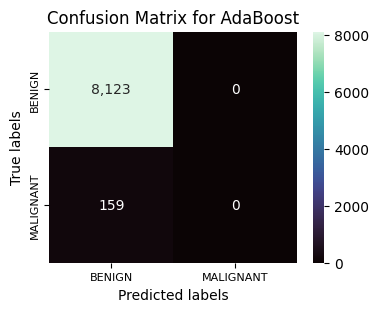

In [79]:
plot_confusion_matrix(y_test, yhat, "Confusion Matrix for AdaBoost")

# Catboost Classifier

In [80]:
from catboost import CatBoostClassifier
m= CatBoostClassifier()
m.fit(x_train, y_train)
yhat= m.predict(x_test)


Learning rate set to 0.040616
0:	learn: 0.6130582	total: 186ms	remaining: 3m 5s
1:	learn: 0.5455517	total: 199ms	remaining: 1m 39s
2:	learn: 0.4826617	total: 212ms	remaining: 1m 10s
3:	learn: 0.4321923	total: 226ms	remaining: 56.3s
4:	learn: 0.3872617	total: 238ms	remaining: 47.3s
5:	learn: 0.3483765	total: 251ms	remaining: 41.5s
6:	learn: 0.3127950	total: 264ms	remaining: 37.5s
7:	learn: 0.2824504	total: 278ms	remaining: 34.5s
8:	learn: 0.2560070	total: 290ms	remaining: 31.9s
9:	learn: 0.2350067	total: 303ms	remaining: 30s
10:	learn: 0.2153858	total: 315ms	remaining: 28.3s
11:	learn: 0.1988179	total: 328ms	remaining: 27s
12:	learn: 0.1847042	total: 340ms	remaining: 25.8s
13:	learn: 0.1725093	total: 352ms	remaining: 24.8s
14:	learn: 0.1619043	total: 366ms	remaining: 24s
15:	learn: 0.1524036	total: 380ms	remaining: 23.3s
16:	learn: 0.1443706	total: 393ms	remaining: 22.7s
17:	learn: 0.1372784	total: 405ms	remaining: 22.1s
18:	learn: 0.1312933	total: 419ms	remaining: 21.6s
19:	learn: 0.12

In [82]:
rep= report(y_test, yhat)
rep

,Accuracy,Precision,Recall,F1 score
0,0.980319,0.3,0.018868,0.035503


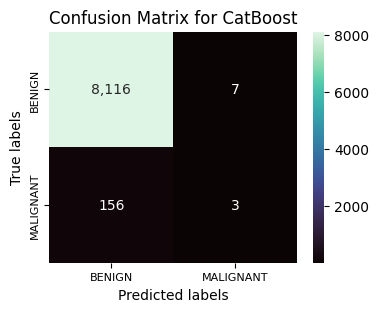

In [84]:
plot_confusion_matrix(y_test, yhat, "Confusion Matrix for CatBoost")

# Conclusions
1. As expected, none of the models performed well.
2. Most of them failed to predict the minority class wholly.
3. Due the huge class imbalances, all the models were biased towards the majority class.
4. So we will use sampling techniques and see how the models perform.